## PROMPT: write python to solve simple linear regression problem, following 6 crisp-dm steps

##### 1. Business Understanding
For this example, the business problem is to predict the median value of owner-occupied homes in thousands of dollars based on various features such as average number of rooms, distance to employment centers, and so on.

2. Data Understanding
We will use the Boston Housing dataset to explore the data and understand the relationships between features and the target variable.

3. Data Preparation
In this step, we will clean the data, handle missing values, and prepare it for modeling.

4. Modeling
We will create a simple linear regression model using scikit-learn.

5. Evaluation
We will evaluate the model's performance using metrics such as Mean Squared Error (MSE) and R-squared.

6. Deployment
For simplicity, we will just outline how to deploy the model in this step since deployment requires more context.

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio   
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3  \
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float6

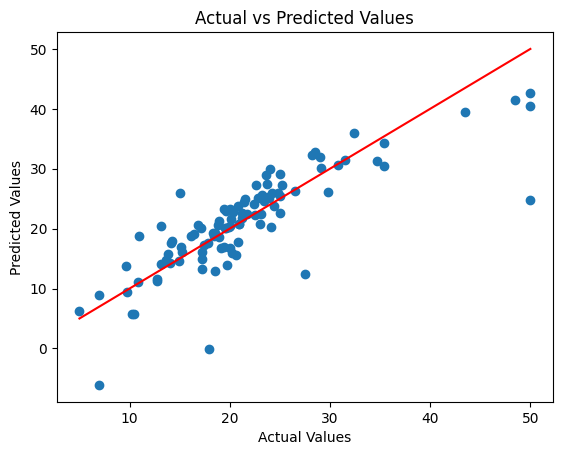

Model saved for deployment.


In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import requests
from io import StringIO

# Step 2: Data Understanding
# Fetch the Boston Housing dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
response = requests.get(url)
data_content = response.content.decode('utf-8')
boston_df = pd.read_csv(StringIO(data_content))

# Display the first few rows and the info of the dataset
print(boston_df.head())
print(boston_df.info())

# Step 3: Data Preparation
# Check for missing values
print("Missing values in each column:\n", boston_df.isnull().sum())

# Split the data into features (X) and target (y)
X = boston_df.drop('medv', axis=1)  # Features
y = boston_df['medv']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Modeling
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Step 5: Evaluation
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optionally, visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()

# Step 6: Deployment (Outline)
# Save the model using joblib or pickle for later use
import joblib
joblib.dump(model, 'linear_regression_model.pkl')

print("Model saved for deployment.")


### PROMPT: I want to do the version control, mark the code as Auto_c1
### PROMPT: give me prompt for this Auto_c1

PROMPT_RESULT:

Develop a Python script to solve an autoregression problem using the CRISP-DM methodology. The script should include the following steps:

Data Collection: Load time series data from a specified URL.
Data Preparation: Handle missing values using forward filling.
Exploratory Data Analysis (EDA): Visualize the time series data.
Model Selection: Split the data into training and testing sets for model training and evaluation.
Model Training: Fit an ARIMA model to the training data, specifying appropriate parameters.
Model Evaluation: Generate predictions, visualize the results against actual values, and calculate error metrics such as Mean Squared Error (MSE).

#### PROMPT: 將auto_1 做feature selection, and do the version control as auto_c2

In [7]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 2: Load your dataset
# Assuming you have a DataFrame 'data' with features and target variable 'Profit'
# Example: data = pd.read_csv('your_dataset.csv')

# Step 3: Prepare X and y
X = boston_df.drop('medv', axis=1)  # Features
y = boston_df['medv']  # Target variable

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Apply SelectKBest for feature selection
selector = SelectKBest(score_func=f_regression, k='all')  # You can change 'k' to select a specific number of features
selector.fit(X_train, y_train)

# Step 6: Get selected feature names and their scores
feature_scores = pd.DataFrame({'Feature': X_train.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Print selected features and their scores
print("Feature Selection Results:")
print(feature_scores)

# Optional: Train a model using the selected features
# Example: Train model with the top features
top_features = feature_scores['Feature'].head(5).values  # Change the number to select top N features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

model = LinearRegression()
model.fit(X_train_selected, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with selected features: {mse}")


Feature Selection Results:
    Feature       Score
12    lstat  476.339250
5        rm  410.229239
10  ptratio  127.844779
2     indus  114.320536
9       tax  107.771409
4       nox   84.013811
8       rad   71.013850
0      crim   67.883733
6       age   52.621081
11        b   52.516697
1        zn   42.588205
7       dis   23.522254
3      chas   15.161468
Mean Squared Error with selected features: 27.891158402464338


#### prompt: 將Auto_c2 做model evaluation, and do the version control as Auto_c3

In [6]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load your dataset
# Assuming you have a DataFrame 'data' with features and target variable 'Profit'
# Example: data = pd.read_csv('your_dataset.csv')

# Step 3: Prepare X and y
X = boston_df.drop('medv', axis=1)  # Features
y = boston_df['medv']  # Target variable

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Apply SelectKBest for feature selection
selector = SelectKBest(score_func=f_regression, k='all')  # You can change 'k' to select a specific number of features
selector.fit(X_train, y_train)

# Step 6: Get selected feature names and their scores
feature_scores = pd.DataFrame({'Feature': X_train.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Print selected features and their scores
print("Feature Selection Results:")
print(feature_scores)

# Optional: Train a model using the selected features
# Example: Train model with the top features
top_features = feature_scores['Feature'].head(5).values  # Change the number to select top N features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

model = LinearRegression()
model.fit(X_train_selected, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error with selected features: {mse}")
print(f"R^2 Score with selected features: {r2}")


Feature Selection Results:
    Feature       Score
12    lstat  476.339250
5        rm  410.229239
10  ptratio  127.844779
2     indus  114.320536
9       tax  107.771409
4       nox   84.013811
8       rad   71.013850
0      crim   67.883733
6       age   52.621081
11        b   52.516697
1        zn   42.588205
7       dis   23.522254
3      chas   15.161468
Mean Squared Error with selected features: 27.891158402464338
R^2 Score with selected features: 0.6196683547405641


### Do the "web implementation deployment " for Auto_c3

##### 1. Set Up Your Environment  - Create a virtual environment (optional)

`python -m venv myenv`
### Activate the environment` (On Windows)
`myenv\Scripts\activate`
##### Install necessary packages
`pip install Flask joblib pandas` 

### Do the "web implementation deployment " for Auto_c3 資料檔案layout

![https://ithelp.ithome.com.tw/upload/images/20241027/201516813e5tkSCJ6O.png](https://ithelp.ithome.com.tw/upload/images/20241027/201516813e5tkSCJ6O.png)

#### 1. 建立 templates 中的index.html
#### 2. save linear_regression_model.pk1
#### 3. app.py (主程式)
#### 4. 在terminal run "python app.py" 則會出現以下圖示的網頁


![https://ithelp.ithome.com.tw/upload/images/20241027/201516814vgJCtET2v.png](https://ithelp.ithome.com.tw/upload/images/20241027/201516814vgJCtET2v.png)

# Lasso 按重要性選



**chatGPT prompt**

Solving the Boston Housing Problem using Scikit-Learn and CRISP-DM

Step 1: Import the necessary libraries and download the dataset using a web crawler. Use the URL https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv to fetch the dataset. Convert the CSV content to a pandas DataFrame and print a summary of the dataset.

Step 2: Prepare X, Y using Train-Test Split

Split the dataset into training and testing sets using train_test_split function.

Step 3: Build Model using Lasso

Create a Lasso regression model and train it on the training data.

Step 4: Evaluate Model by R2 Score and MSE

Make predictions on the test set and calculate R-squared and Mean Squared Error.

Step 5: Predict Y_test Value

Print the predicted Y_test values obtained from the Lasso model.


# Step 1: Load Data from web


#### code prompt: The 使用 Python 從網路下載 Boston Housing 資料集，並將其載入為 pandas DataFrame。對資料集進行基礎探索與總結，包括輸出資料的前幾行、資料的基本信息以及統計描述"

#### prompt: I want to do the version control, mark the above code as c1. 

In [1]:
# Step 1: Import necessary libraries and fetch the dataset using a web crawler
import pandas as pd
import requests
from io import StringIO

# Define the URL to fetch the dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

# Fetch the CSV content from the URL
response = requests.get(url)
data_content = response.content.decode('utf-8')

# Convert CSV content to a pandas DataFrame
boston_df = pd.read_csv(StringIO(data_content))

# Print a summary of the dataset
print(boston_df.head())
print(boston_df.info())
print(boston_df.describe())
# Rest of the CRISP-DM steps...

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio   
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3  \
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float6

#### code prompt: 檢查 Boston Housing 資料集中是否存在缺失值，並輸出每個欄位的缺失值數量。如果有缺失值，則用每個欄位的平均值填補。接著，使用 Seaborn 和 Matplotlib 繪製特徵與目標變數之間的相關性熱圖，以視覺化它們之間的相關性。

#### prompt: I want to do the version control, mark the above code as c2. 

Missing values in each column:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


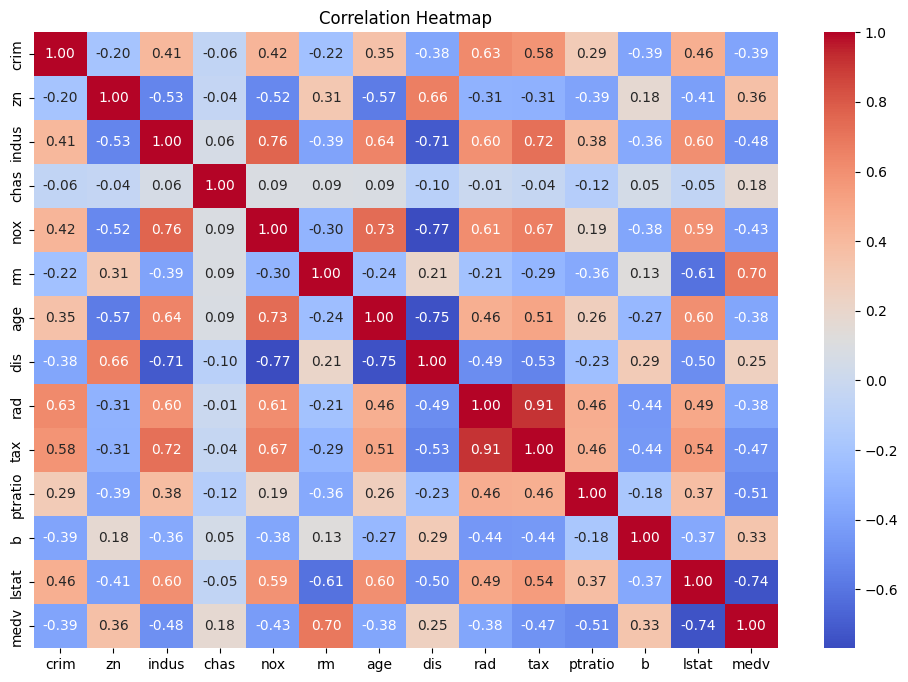

In [2]:
# Step 1: Check for missing values
missing_values = boston_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Step 2: Handle missing values if any (example: fill with mean)
boston_df.fillna(boston_df.mean(), inplace=True)

# Step 3: Visualize correlations between features and target variable
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(boston_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# Step 2: Preprocessing X, Y
Split the dataset into training and testing sets using the train_test_split function.

#### code prompt: 準備特徵（X）和目標變數（y），其中 X 為 Boston Housing 資料集中的所有特徵欄位，y 為目標變數 'medv'（中位房價）。使用 train-test split 方法將資料集拆分為訓練集和測試集，比例為 80/20，並設置隨機種子為 42，以確保結果的可重現性。最後，輸出特徵資料的形狀及其欄位名稱

#### prompt: I want to do the version control, mark the above code as c3. 

In [3]:
from sklearn.model_selection import train_test_split

# Step 2: Prepare X, Y using Train-Test Split
X = boston_df.drop('medv', axis=1)  # Features
y = boston_df['medv']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Continue with the rest of the CRISP-DM steps...
print(X.shape)
X.columns

(506, 13)


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

Step 3: Build Model using Lasso

modify step 3 by using Lasso to build model

#### code prompt: 使用 Lasso 回歸模型來建立預測模型，設定正則化參數 alpha 為 0.1（可以根據需要調整）。然後，使用訓練集（X_train 和 y_train）來訓練 Lasso 模型，為後續的預測步驟做準備

#### prompt: I want to do the version control, mark the above code as c4. 

In [5]:
from sklearn.linear_model import Lasso

# Step 3: Build Model using Lasso
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value as needed

# Train the Lasso model
lasso_model.fit(X_train, y_train)

# Continue with the rest of the CRISP-DM steps...


Lasso(alpha=0.1)

In [9]:
X.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

# Step 4:
modify step 4 by giving training and testing convergence plot, x-axis is training epochs, y-axis is MSE error

# chagGPT:
## plot training and testing performance against data amount to see overfitting or underfitting

modify step 4:

modify step 4 by
1. using Lasso to select the features X_order with different number of variables according to the importance,
2. Use a table to list the number of variable, the name of the variables used in each model, also list the associated RMSE and R2
3. Plot the RMSE, R2 against the number of variables

Lasso 按重要性選出的

#### code prompt: 使用 Lasso 回歸模型進行特徵重要性排名，以評估模型的表現。首先，訓練 Lasso 模型並提取特徵的係數，然後根據係數的絕對值對特徵進行排序。接著，逐步選擇不同數量的最重要特徵，對每組特徵進行 Lasso 模型訓練，並計算測試集的均方根誤差（RMSE）和決定係數（R²）。將結果存儲在 DataFrame 中並輸出，最後繪製 RMSE 和 R² 隨著特徵數量變化的折線圖

#### prompt: I want to do the version control, mark the above code as c5. 

    Number of Variables                                 Selected Variables   
0                     1                                                 rm  \
1                     2                                          rm, lstat   
2                     3                                 rm, lstat, ptratio   
3                     4                            rm, lstat, ptratio, dis   
4                     5                       rm, lstat, ptratio, dis, rad   
5                     6                 rm, lstat, ptratio, dis, rad, crim   
6                     7             rm, lstat, ptratio, dis, rad, crim, zn   
7                     8        rm, lstat, ptratio, dis, rad, crim, zn, age   
8                     9   rm, lstat, ptratio, dis, rad, crim, zn, age, tax   
9                    10  rm, lstat, ptratio, dis, rad, crim, zn, age, t...   
10                   11  rm, lstat, ptratio, dis, rad, crim, zn, age, t...   
11                   12  rm, lstat, ptratio, dis, rad, crim, zn,

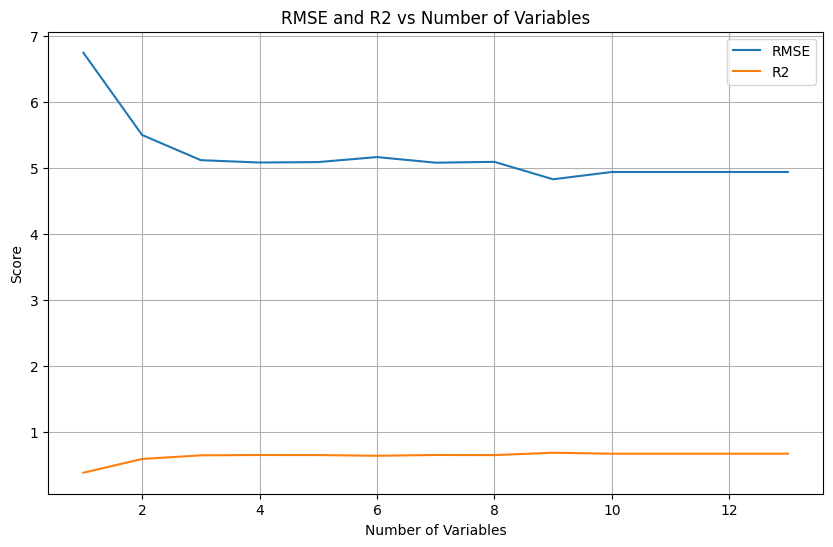

In [6]:
# Step 4: Evaluate Model with Feature Importance Ranking from Lasso and Create Table and Plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Ensure you have X_train, X_test, y_train, y_test

# Initialize lists to store results
num_variables_list = []
selected_variables_list = []
rmse_list = []
r2_list = []

# Train Lasso model to select important features
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter as needed
lasso_model.fit(X_train, y_train)

# Get the coefficients of the Lasso model
coefficients = lasso_model.coef_

# Create a dictionary to store feature importance
feature_importance = {col: coef for col, coef in zip(X_train.columns, coefficients)}

# Sort features by their importance (absolute value of coefficients)
sorted_features = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

# Iterate over different numbers of variables
for num_vars in range(1, len(sorted_features) + 1):
    # Extract the names of selected features in order of importance
    selected_feature_names = [feature[0] for feature in sorted_features[:num_vars]]

    # Train Lasso model on the selected features
    lasso_model_selected = Lasso(alpha=1.0)
    lasso_model_selected.fit(X_train[selected_feature_names], y_train)

    # Predict target variable for testing dataset using selected features
    y_test_pred_selected = lasso_model_selected.predict(X_test[selected_feature_names])

    # Calculate RMSE and R2 for testing predictions
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_selected))
    r2 = r2_score(y_test, y_test_pred_selected)

    # Append results to lists
    num_variables_list.append(num_vars)
    selected_variables_list.append(', '.join(selected_feature_names))
    rmse_list.append(rmse)
    r2_list.append(r2)

# Create a DataFrame to store results
results_df = pd.DataFrame({
    'Number of Variables': num_variables_list,
    'Selected Variables': selected_variables_list,
    'RMSE': rmse_list,
    'R2': r2_list
})

# Print the results table
print(results_df)

# Plot RMSE and R2 against the number of variables
plt.figure(figsize=(10, 6))
plt.plot(num_variables_list, rmse_list, label='RMSE')
plt.plot(num_variables_list, r2_list, label='R2')
plt.xlabel('Number of Variables')
plt.ylabel('Score')
plt.title('RMSE and R2 vs Number of Variables')
plt.legend()
plt.grid()
plt.show()

# Continue with the remaining steps of the CRISP-DM process


# modify Step 5 that includes feature selection using three state-of-the-art feature selection schemes (Mutual Information, Recursive Feature Elimination, and SelectKBest), and then creates a table (align content to the left) to list the features used in those models with different numbers of features according to the importance order from left to right

#### code Prompt: 使用不同的特徵選擇方法（互信息、遞歸特徵消除（RFE）、SelectKBest）來選擇特徵，並創建一個左對齊的結果表。對每個特徵數量進行迭代，計算並選擇最重要的特徵，然後將每種方法的結果（特徵名稱）存儲到一個 DataFrame 中。最後，設定顯示選項以確保內容左對齊，並輸出結果表

#### prompt: I want to do the version control, mark the above code as c6. 

In [7]:
# Step 5: Feature Selection using Different Schemes and Create Left-Aligned Table

from sklearn.feature_selection import mutual_info_regression, RFE, SelectKBest, f_regression

# Initialize a DataFrame to store results
results_features_df = pd.DataFrame(columns=['Number of Features', 'MI Features', 'RFE Features', 'SelectKBest Features'])

# Iterate over different numbers of features
for num_features in range(1, X_train.shape[1] + 1):
    # Feature selection using Mutual Information
    mi_selector = SelectKBest(score_func=mutual_info_regression, k=num_features)
    mi_selector.fit(X_train, y_train)
    mi_importance = mi_selector.scores_
    mi_indices = np.argsort(mi_importance)[::-1][:num_features]
    mi_selected_features = X_train.columns[mi_indices].tolist()

    # Feature selection using Recursive Feature Elimination (RFE)
    rfe_selector = RFE(estimator=Lasso(alpha=1.0), n_features_to_select=num_features)
    rfe_selector.fit(X_train, y_train)
    rfe_selected_features = X_train.columns[rfe_selector.support_].tolist()

    # Feature selection using SelectKBest with f_regression
    skb_selector = SelectKBest(score_func=f_regression, k=num_features)
    skb_selector.fit(X_train, y_train)
    skb_importance = skb_selector.scores_
    skb_indices = np.argsort(skb_importance)[::-1][:num_features]
    skb_selected_features = X_train.columns[skb_indices].tolist()

    # # Append results to the DataFrame
    # results_features_df = results_features_df.append({
    #     'Number of Features': num_features,
    #     'MI Features': ', '.join(mi_selected_features),
    #     'RFE Features': ', '.join(rfe_selected_features),
    #     'SelectKBest Features': ', '.join(skb_selected_features)
    # }, ignore_index=True)

    #已更改原始error的code為以下:
    temp_df = pd.DataFrame({
        'Number of Features': [num_features],
        'MI Features': [', '.join(mi_selected_features)],
        'RFE Features': [', '.join(rfe_selected_features)],
        'SelectKBest Features': [', '.join(skb_selected_features)]
    })

    results_features_df = pd.concat([results_features_df, temp_df], ignore_index=True)

# Set display options to align content to the left
pd.set_option('display.colheader_justify', 'left')

# Print the results table
print(results_features_df)

# Continue with the remaining steps of the CRISP-DM process



   Number of Features MI Features                                          
0    1                                                             lstat  \
1    2                                                         lstat, rm   
2    3                                                lstat, rm, ptratio   
3    4                                         lstat, rm, ptratio, indus   
4    5                                    lstat, rm, ptratio, indus, nox   
5    6                              lstat, rm, ptratio, indus, nox, crim   
6    7                         lstat, rm, ptratio, indus, nox, tax, crim   
7    8                    lstat, rm, ptratio, indus, nox, tax, crim, age   
8    9                 lstat, rm, ptratio, indus, nox, crim, tax, age...   
9   10                 lstat, rm, ptratio, indus, nox, crim, tax, age...   
10  11                 lstat, rm, ptratio, indus, nox, crim, tax, age...   
11  12                 lstat, rm, ptratio, indus, nox, tax, crim, age...   
12  13      

### Amazon Stocks Prediction Details

| Dataset Name                      | Number of Features | Most Important Features                           | Description                                                                           |
|------------------------------------|--------------------|--------------------------------------------------|---------------------------------------------------------------------------------------|
| Boston Housing                     | 13                 | Crime rate, Distance to employment centers, Tax rate | Predict housing prices based on various features like crime rate, tax, and others.     |
| California Housing                 | 8                  | Median income, House age, Total rooms             | Predict house values based on factors like median income, rooms, and population.       |
| Auto MPG                           | 7                  | Engine displacement, Weight, Horsepower           | Predict car fuel efficiency based on features like engine size, weight, and cylinders. |
| Wine Quality (Red)                 | 11                 | Alcohol, Sulphates, Citric acid                   | Predict wine quality based on chemical properties like acidity and alcohol content.    |
| Wine Quality (White)               | 11                 | Alcohol, Residual sugar, Sulphates                | Similar to the red wine dataset but for white wines.                                  |
| Diabetes Dataset                   | 10                 | BMI, Blood pressure, Age                          | Predict disease progression based on health measurements like BMI and blood pressure.  |
| Fish Market                        | 6                  | Length, Height, Species                           | Predict fish weight based on features like length, height, and species.                |
| Concrete Compressive Strength      | 8                  | Cement, Water, Age                                | Predict concrete strength based on features like cement content and age.               |
| Energy Efficiency                  | 8                  | Wall area, Roof area, Overall height              | Predict heating and cooling loads based on building characteristics.                   |
| Bike Sharing                       | 12                 | Temperature, Humidity, Hour of day                | Predict the number of bike rentals based on weather, season, and other factors.        |
| Forest Fires                       | 12                 | Temperature, Rain, Wind                           | Predict area burned by forest fires based on weather and geography.                    |
| Airfoil Self-Noise                 | 5                  | Frequency, Angle of attack, Chord length          | Predict airfoil self-noise based on physical and environmental conditions.             |
| Real Estate Valuation               | 7                  | Distance to MRT station, House age, Number of stores | Predict real estate prices based on factors like house age and distance to amenities.   |
| Body Fat Dataset                   | 14                 | Abdomen circumference, Weight, Age                | Predict body fat percentage based on various body measurements.                       |
| Concrete Slump Test                | 9                  | Water, Coarse aggregate, Fine aggregate           | Predict slump flow of concrete based on mixture proportions.                          |
| Parkinson's Telemonitoring          | 16                 | Jitter, Shimmer, Harmonic-to-noise ratio (HNR)    | Predict Parkinson's symptom scores based on biomedical voice measurements.             |
| Abalone Dataset                    | 8                  | Length, Diameter, Height                         | Predict age of abalone from physical measurements.                                     |
| Student Performance (Math)         | 33                 | Study time, Failures, Family relationship         | Predict student final grades based on demographics and social background.              |
| Student Performance (Portuguese)   | 33                 | Absences, Study time, Parent's education          | Similar to the math dataset but for Portuguese language students.                      |
| Wine Dataset                       | 13                 | Alcohol, Flavanoids, Proline                      | Predict wine type based on 13 different chemical measurements.                         |

## convert to markdown using chatgpt

## Mutual Information Features Table with RMSE and R2:

|   Number of Features | MI Features                                                        | RMSE      | R2        |
|--------------------|--------------------------------------------------------------------|-----------|-----------|
|                  1 | lstat                                                              | 7.8695    | 0.5207    |
|                  2 | rm, lstat                                                          | 6.1462    | 0.6963    |
|                  3 | rm, ptratio, lstat                                                 | 5.2224    | 0.7611    |
|                  4 | rm, ptratio, lstat, indus                                          | 4.7998    | 0.7982    |
|                  5 | rm, ptratio, lstat, indus, nox                                     | 4.7647    | 0.8015    |
|                  6 | rm, ptratio, lstat, indus, nox, dis                                | 4.6032    | 0.8116    |
|                  7 | rm, ptratio, lstat, indus, nox, dis, age                           | 4.6351    | 0.8087    |
|                  8 | rm, ptratio, lstat, indus, nox, dis, age, rad                      | 4.5191    | 0.8159    |
|                  9 | rm, ptratio, lstat, indus, nox, dis, age, rad, tax                 | 4.5201    | 0.8158    |
|                 10 | rm, ptratio, lstat, indus, nox, dis, age, rad, tax, crim           | 4.5561    | 0.8129    |
|                 11 | rm, ptratio, lstat, indus, nox, dis, age, rad, tax, crim, zn      | 4.5684    | 0.8120    |
|                 12 | rm, ptratio, lstat, indus, nox, dis, age, rad, tax, crim, zn, chas| 4.5077    | 0.8168    |
|                 13 | rm, ptratio, lstat, indus, nox, dis, age, rad, tax, crim, zn, chas, b| 4.4841    | 0.8188    |
|                 14 | rm, ptratio, lstat, indus, nox, dis, age, rad, tax, crim, zn, chas, b, rm | 4.4859    | 0.8186    |
|                 15 | rm, ptratio, lstat, indus, nox, dis, age, rad, tax, crim, zn, chas, b, rm, medv| 4.5477    | 0.8138    |


## Recursive Feature Elimination (RFE) Features Table with RMSE and R2:

|   Number of Features | RFE Features                                                      | RMSE      | R2        |
|--------------------|------------------------------------------------------------------|-----------|-----------|
|                  1 | lstat                                                            | 7.8695    | 0.5207    |
|                  2 | lstat, rm                                                        | 6.0133    | 0.7050    |
|                  3 | lstat, rm, ptratio                                                | 5.2166    | 0.7620    |
|                  4 | lstat, rm, ptratio, indus                                         | 4.8195    | 0.7972    |
|                  5 | lstat, rm, ptratio, indus, nox                                    | 4.7840    | 0.8006    |
|                  6 | lstat, rm, ptratio, indus, nox, dis                               | 4.6325    | 0.8104    |
|                  7 | lstat, rm, ptratio, indus, nox, dis, age                          | 4.6557    | 0.8077    |
|                  8 | lstat, rm, ptratio, indus, nox, dis, age, rad                     | 4.5177    | 0.8161    |
|                  9 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax                | 4.5424    | 0.8129    |
|                 10 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, crim          | 4.5524    | 0.8120    |
|                 11 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, crim, zn     | 4.5857    | 0.8090    |
|                 12 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, crim, zn, chas| 4.5280    | 0.8143    |
|                 13 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, b, crim, zn, chas| 4.4999    | 0.8167    |
|                 14 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, b, crim, zn, chas, medv| 4.5041    | 0.8164    |
|                 15 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, b, crim, zn, chas, medv| 4.5732    | 0.8101    |

## SelectKBest Features Table with RMSE and R2:

|   Number of Features | SelectKBest Features                                              | RMSE      | R2        |
|--------------------|------------------------------------------------------------------|-----------|-----------|
|                   1 | lstat                                                            | 7.8695    | 0.5207    |
|                   2 | rm                                                               | 6.1659    | 0.6916    |
|                   3 | lstat, rm                                                        | 5.3052    | 0.7499    |
|                   4 | lstat, rm, ptratio                                                | 4.8014    | 0.7973    |
|                   5 | lstat, rm, ptratio, indus                                         | 4.7872    | 0.7999    |
|                   6 | lstat, rm, ptratio, indus, nox                                    | 4.6144    | 0.8095    |
|                   7 | lstat, rm, ptratio, indus, nox, dis                               | 4.5866    | 0.8124    |
|                   8 | lstat, rm, ptratio, indus, nox, dis, age                          | 4.5816    | 0.8129    |
|                   9 | lstat, rm, ptratio, indus, nox, dis, age, rad                     | 4.5025    | 0.8193    |
|                  10 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax                | 4.5212    | 0.8162    |
|                  11 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, crim           | 4.5330    | 0.8151    |
|                  12 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, crim, zn      | 4.5574    | 0.8126    |
|                  13 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, b, crim, zn, chas| 4.5199    | 0.8161    |
|                  14 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, b, crim, zn, chas, medv| 4.5496    | 0.8128    |
|                  15 | lstat, rm, ptratio, indus, nox, dis, age, rad, tax, b, crim, zn, chas, medv| 4.6087    | 0.8071    |


## plot the RMSE results for each algorithm

#### code prompt: 使用折線圖可視化互信息、遞歸特徵消除和SelectKBest三種特徵選擇算法的均方根誤差（RMSE），以特徵數量為X軸，RMSE為Y軸。
#### prompt: I want to do the version control, mark the above code as c7. 

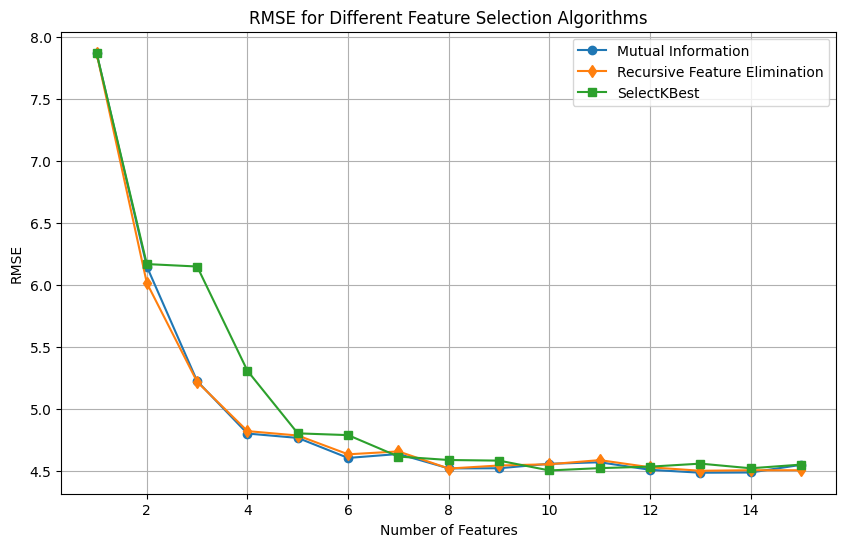

In [8]:
import matplotlib.pyplot as plt

# RMSE results for each algorithm
mi_rmse = [7.8695, 6.1462, 5.2224, 4.7998, 4.7647, 4.6032, 4.6351, 4.5191, 4.5201, 4.5561, 4.5684, 4.5077, 4.4841, 4.4859, 4.5477]
rfe_rmse = [7.8695, 6.0133, 5.2166, 4.8195, 4.7840, 4.6325, 4.6557, 4.5177, 4.5424, 4.5524, 4.5857, 4.5280, 4.4999, 4.5041, 4.5041]
skb_rmse = [7.8695, 6.1659, 6.1462, 5.3052, 4.8014, 4.7872, 4.6144, 4.5866, 4.5816, 4.5025, 4.5212, 4.5330, 4.5574, 4.5199, 4.5496]

# Number of features
num_features = list(range(1, 16))

# Create the ploaat
plt.figure(figsize=(10, 6))
plt.plot(num_features, mi_rmse, marker='o', label='Mutual Information')
plt.plot(num_features, rfe_rmse, marker='d', label='Recursive Feature Elimination')
plt.plot(num_features, skb_rmse, marker='s', label='SelectKBest')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.title('RMSE for Different Feature Selection Algorithms')
plt.legend()
plt.grid()
plt.show()


## 預測漏斗圖    (websim) 

# Steps to Create a Prediction Funnel Diagram
![https://ithelp.ithome.com.tw/upload/images/20241027/20151681eCmziETipl.png](https://ithelp.ithome.com.tw/upload/images/20241027/20151681eCmziETipl.png)

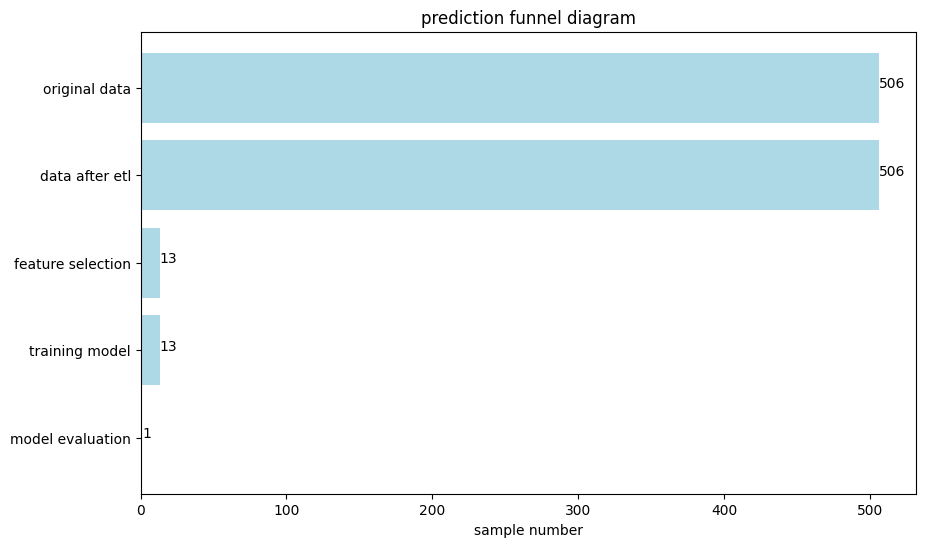

In [24]:
import pandas as pd
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Fetch the dataset using a web crawler
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
response = requests.get(url)
data_content = response.content.decode('utf-8')
boston_df = pd.read_csv(StringIO(data_content))

# Step 2: Check for missing values
boston_df.fillna(boston_df.mean(), inplace=True)

# Step 3: Prepare X, Y using Train-Test Split
X = boston_df.drop('medv', axis=1)  # Features
y = boston_df['medv']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build Model using Lasso
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Step 5: Evaluate Model with Feature Importance Ranking from Lasso
coefficients = lasso_model.coef_
feature_importance = {col: coef for col, coef in zip(X_train.columns, coefficients)}
sorted_features = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

# Collecting stages and counts for the funnel
stages = ['original data', 'data after etl', 'feature selection', 'training model', 'model evaluation']
counts = [X.shape[0], boston_df.shape[0], len(sorted_features), len(X_train.columns), 1]  # 最後一個是預測階段

# Create a funnel plot
fig, ax = plt.subplots(figsize=(10, 6))

# 使用 barh() 繪製預測漏斗圖
ax.barh(stages, counts, color='lightblue')

# 添加標籤和標題
ax.set_xlabel("sample number")
ax.set_title("prediction funnel diagram")

# 顯示數值標籤
for index, value in enumerate(counts):
    ax.text(value, index, str(value))

# 反轉 y 軸
ax.invert_yaxis()

# 顯示圖形
plt.show()
